## Preparacion grafo Pippo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df_tot = pd.read_csv('Pippo_tot_ana.csv')

df_tot.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452063 entries, 0 to 452062
Data columns (total 37 columns):
OrderId                        452063 non-null object
Id                             452063 non-null int64
ProductId                      452063 non-null int64
ProductLine                    452063 non-null object
ProductType                    452063 non-null object
Name                           452063 non-null object
Quantity                       452063 non-null int64
Price                          452063 non-null float64
ListPrice                      452063 non-null float64
PromoName                      452063 non-null object
RawItemDiscount                452063 non-null float64
GrossItemAmountDiscount        452063 non-null float64
TotalOrderGross                452063 non-null float64
TotalDiscountPrice             452063 non-null float64
ShippingCost                   452063 non-null float64
Value                          452063 non-null float64
DocumentType        

In [4]:
len(df_tot['ProductId'].unique())

2313

In [5]:
df_tot.head()

,OrderId,Id,ProductId,ProductLine,ProductType,Name,Quantity,Price,ListPrice,PromoName,...,City,Neighborhood,SelectedAddressNeighborhood,Street,PostalCode,SelectedAddressPostalCode,SelectedAddressReference,Lat,Lng,HostName
0,937403242935-01,3483,1930,Baño,Toallas y Toallones,Juego de Toalla y Toallón Liso Color Blanco,1,699.0,699.0,DISCOUNT@MARKETPLACE,...,Junín,NaN,NaN,Guemes,6000.0,6000.0,NaN,-37.522274,-60.772541,Pippo
1,937403242935-01,694,447,Baño,Toallas y Toallones,Juego de Toalla y Toallón Línea Turbat Color B...,1,699.0,699.0,DISCOUNT@MARKETPLACE,...,Junín,NaN,NaN,Guemes,6000.0,6000.0,NaN,-37.522274,-60.772541,Pippo
2,937403242935-01,4527,2478,Dormitorio,Sábanas,Juego de Sábanas Cuna Funcional Milo Safari Co...,1,1199.0,1199.0,DISCOUNT@MARKETPLACE,...,Junín,NaN,NaN,Guemes,6000.0,6000.0,NaN,-37.522274,-60.772541,Pippo
3,937403242935-01,4610,2517,Dormitorio,Sábanas,Juego de Sábanas Cuna Milo Bebé Color Rosa,1,1299.0,1299.0,DISCOUNT@MARKETPLACE,...,Junín,NaN,NaN,Guemes,6000.0,6000.0,NaN,-37.522274,-60.772541,Pippo
4,864002818483-01,2723,1486,Dormitorio,Sábanas,Juego de Sábanas Queen Size Pétalos Color Verd...,1,1399.0,1399.0,DISCOUNT@MARKETPLACE,...,Junín,NaN,NaN,Guemes,6000.0,6000.0,NaN,0.000000,0.000000,Pippo


In [6]:
def describe_nulls(dataframe):
    # primero almaceno los valores de cantidad de nulos y cantidad de datos completos en dos variables
    print('Cantidad de nulos por columna')
    print('\n')
    nulos = dataframe.isnull().sum().sort_values()
    print(nulos)
    print('\n')
    completos = dataframe.notnull().sum().sort_values().reindex(nulos.index)
    #tener en cuenta que el índice de 'completos' será el mismo que el de nulos.

    # luego, defino los valores que van a tomar los ejes
    ejex = np.arange(len(nulos)) # el eje x va a tener 26 valores que corresponden a cada una de las variables del df
    ejey1 = nulos.values # el eje y para el gráfico 1, tomara cantidad de nulos por columnas
    ejey2 = completos.values # el eje y para el gráfico 2, tomará cantidad de datos completos por columna

    # inicializo el gráfico.
    # no hago 'fig, ax = plt.subplots()' porque en la manera que lo hago puedo definir el tamaño del gráfico
    # el tamaño del gráfico estará en figsize
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)

    #ploteo los valores
    grafico1 = ax.bar(x=ejex, height=ejey1, #es decir, el gráfico 1 ploteará los valores nulos
                      color='r', 
                      width=.65)
    grafico2 = ax.bar(x=ejex, height=ejey2, # el gráfico 2 ploteará los valores completos
                      color='g', 
                      bottom=ejey1, 
                      width=.65, 
                      alpha=0.5)

    # luego establezco las leyendas del gráfico.
    plt.xticks(ticks=ejex, labels=nulos.index, rotation=80, fontsize=15) # asignarle a cada punto sobre el eje x
    # el valor correspondiente en los indices de la serie de nulos.
    # plt.xticks es gracias a lo que en el eje x me quedan los nombres de las columnas
    plt.ylabel('Cantidad de nulos', fontsize=20)
    plt.xlabel('Variable', fontsize=20)
    plt.title('Porcentaje de nulos por columna', fontsize=20)
    plt.legend((grafico2, grafico1), ('Completos', 'Nulos'), fontsize=20)

    #por último, para cada una de las barras del gráfico, quiero que me diga 
    #cuál es el porcentaje del valor con respecto al total
    for rect in grafico1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '{0:d}%'.format(int((height*100)/len(dataframe))), 
                 ha='center', va='bottom', fontsize=13)
        
    print('\n')
    
    cant_nulos = nulos.sum()
    cant_compls = dataframe.count().sum()
    labels = ['Cantidad nulos', 'Cantidad completos']
    values = [cant_nulos, cant_compls]

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.set(title='Porcentaje total de nulos')
    grafico = ax.pie(values,labels=labels,colors=['r','g'], autopct='%1.1f%%', shadow=True)

Cantidad de nulos por columna


OrderId                             0
Lat                                 0
Street                              0
City                                0
State                               0
Country                             0
AddressType                         0
dia                                 0
mes                                 0
año                                 0
Lng                                 0
Documento                           0
DocumentType                        0
Value                               0
OrderDate                           0
TotalDiscountPrice                  0
Id                                  0
ProductId                           0
ProductLine                         0
ProductType                         0
ShippingCost                        0
Quantity                            0
Name                                0
Price                               0
ListPrice                           0
PromoName         

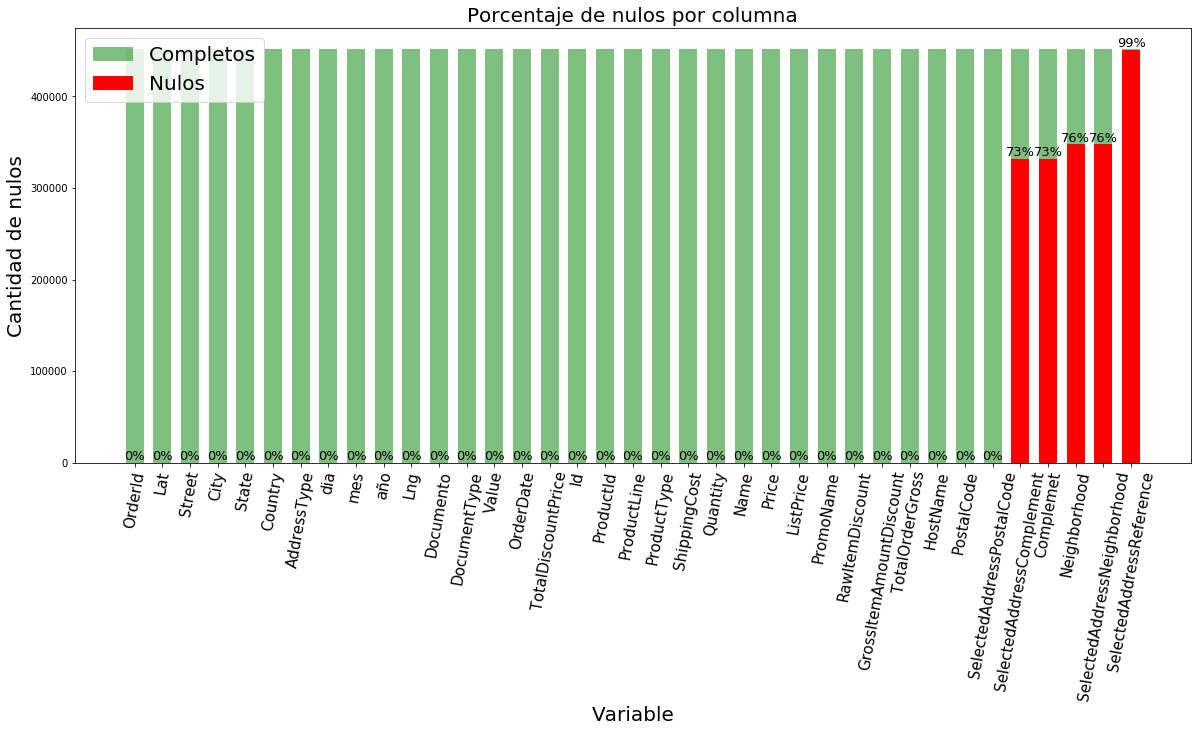

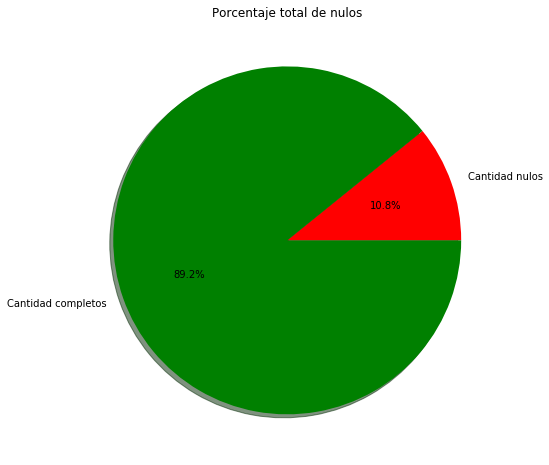

In [7]:
describe_nulls(df_tot)

In [8]:
columnas = df_tot.columns
columnas

Index(['OrderId', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Name',
       'Quantity', 'Price', 'ListPrice', 'PromoName', 'RawItemDiscount',
       'GrossItemAmountDiscount', 'TotalOrderGross', 'TotalDiscountPrice',
       'ShippingCost', 'Value', 'DocumentType', 'Documento', 'OrderDate',
       'año', 'mes', 'dia', 'Complemet', 'SelectedAddressComplement',
       'AddressType', 'Country', 'State', 'City', 'Neighborhood',
       'SelectedAddressNeighborhood', 'Street', 'PostalCode',
       'SelectedAddressPostalCode', 'SelectedAddressReference', 'Lat', 'Lng',
       'HostName'],
      dtype='object')

Lo siguiente indica que hay muchísimos Id repetidos, es decir que por factura hay muchos productos. De hecho, pocas facturas, sólo 4198

In [9]:
# creo que esto es equivalente al método nunique() de pandas.
def column_uniques(df):
    return pd.Series([len(df[column].unique()) for column in df.columns], 
                     index=[column for column in df.columns])

In [10]:
# almaceno los resultados de la función de arriba en una variable para cada df.

unicos_df_tot = column_uniques(df_tot)

In [11]:
unicos_df_tot.sort_values()

HostName                            2
año                                 2
AddressType                         3
DocumentType                        3
Country                             4
dia                                 7
ProductLine                         8
Quantity                           11
mes                                12
ShippingCost                       16
ProductType                        27
State                              72
SelectedAddressReference          232
ListPrice                         244
Price                             246
OrderDate                         415
Neighborhood                      619
SelectedAddressNeighborhood       619
City                             2028
SelectedAddressPostalCode        2089
PostalCode                       2089
ProductId                        2313
Name                             3954
Id                               4100
TotalOrderGross                  7891
Complemet                        9978
SelectedAddr

# Búsqueda del trabajo

La idea principal va a ser buscar productos que co-aparecen en un cierto número de facturas. Es decir, que existe un número de facturas mayor a un umbral arbitrario en donde aparecen dos productos simultáneamente. <br>

Para hacer esto, procedo según los siguientes pasos:
1. Primero creo una función que para cada producto devuelve el conjunto de facturas en las que aparece. 
2. Armo una lista de conjuntos de órdenes de venta, en donde los índices coincidirán con los de los productos, y por lo tanto sabré que cada conjunto de órdenes corresponderá a un producto. 
3. Lueguo, termino generando tuplas de productos (que representan aristas de un grafo) en caso de que la intersección de los conjuntos de órdenes de ventas asociados a cada uno de esos productos sea mayor al umbral.
4. Con esto generaré múltiples grafos y analizaré las características de alguna selección de ellos

In [12]:
def facturas(producto):
    mask = df_tot.ProductId == producto
    return set(df_tot[mask].OrderId.unique()) # es decir, las órdenes en el df filtrado 
# por ID producto = producto trabajado

#comentario: el unique() de OrderId debería ser indistinto, un producto no debería aparecer dos veces en una misma orden.

In [13]:
productos = df_tot.ProductId.unique() #la lista de productos vendidos.
ordenes = [facturas(producto) for producto in productos] #lista de conjuntos de órdenes de venta

num_ordenes = [len(orden) for orden in ordenes] # en cuántas órdenes aparece cada producto.
datos = pd.DataFrame(data = np.array([productos,num_ordenes]).transpose(), 
                     columns=['ID Producto', 'Cantidad Ordenes'])

El dataframe que resulta de lo de abajo es bastante informativo. Nos dice qué productos son los más vendidos, y en cuántas facturas aparecen. <br>
Es notable que, mientras que el total de facturas que manejamos es aprox 260.000, el producto más vendido sólo aparece en aprox 9500. <br>
Otro dato interesante es que los primeros dos productos, además de ser los más vendidos, también aparecen juntos en al menos 400 facturas (o 500, no recuerdo). De todos modos, si después nos fijamos en el nombre de esos productos, los dos son juegos de toallas y toallones.

In [14]:
datos.sort_values(by='Cantidad Ordenes', ascending=False)

,ID Producto,Cantidad Ordenes
1,447,7976
9,449,2702
144,615,2687
213,842,2201
108,455,2097
484,320,2082
90,535,2020
194,2362,1943
81,1101,1784
0,1930,1756


In [15]:
# función para generar las aristas del grafo -pares de productos que co-aparecen un número de facturas
# el número de facturas se determinar por el umbral.

def generar_tuplas(umbral):
    tuplas = [ {productos[n], productos[m]} 
              for n in range(len(productos)) 
              for m in range(n+1, len(productos)) # esto quiere decir que una vez que comparamos un producto
              # con el resto, ya no volveremos a compararlo, porque el grafo es no dirigido.
              if len(ordenes[n] & ordenes[m]) > umbral]
    return tuplas

# con el siguiente código genero aristas para 300 grafos.
# tarda mucho, así que lo dejo comentado para que corra el notebook entero sin demoras.
# una vez que se genera puntos, descodear esta instruccion sino dara error, pasar a comentarios o markdown
puntos = [generar_tuplas(num) for num in range(1,300)] # guarda con esta que tarda

# con el siguiente código exporto todas las aristas a un txt, que desde ahí levanta mucho más rápido.
with open('puntos.txt', 'x') as f:
    for item in puntos:
        if puntos.index(item) == len(puntos)-1:
            f.write(str(item))
        else:
            f.write(str(item) + ',')

In [17]:
# levanto el txt con las aristas para todos los grafos

txt = open('puntos.txt', 'r')
puntos = list(eval(txt.read()))
txt.close()
# si se fijan, es una lista de listas de tuplas:
# cada tupla es una arista, y cada sublista es un grafo.

Ahora armo un grafo de los 300 que generé para visualizar un poco cuál es el resultado

In [18]:
# por lo que dije más arriba, generar_tuplas(20) y puntos[19] deberían ser equivalentes, pero no lo son.
# tuplas = generar_tuplas(20)
tuplas = puntos[19]

In [19]:
co_aps = nx.Graph()

# co_aps.add_nodes_from(productos)
co_aps.add_edges_from(tuplas)

In [20]:
# nx.write_gexf(co_aps, "co_aps_umb_50.gexf") # esta línea exporta el archivo co_aps.gexf a la carpeta contenedora del notebook
# este tipo de archivo se puede levanta desde gephi, como tambien desde jupyter.

In [21]:
nodos = list(co_aps.nodes)
edges = list(co_aps.edges)

print(len(nodos), len(edges))

498 1222


In [22]:
kwargs = {'width':0.2, 'node_size':5, 'with_labels':False}

C:\Users\hmarq\Anaconda3\envs\Pippo\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


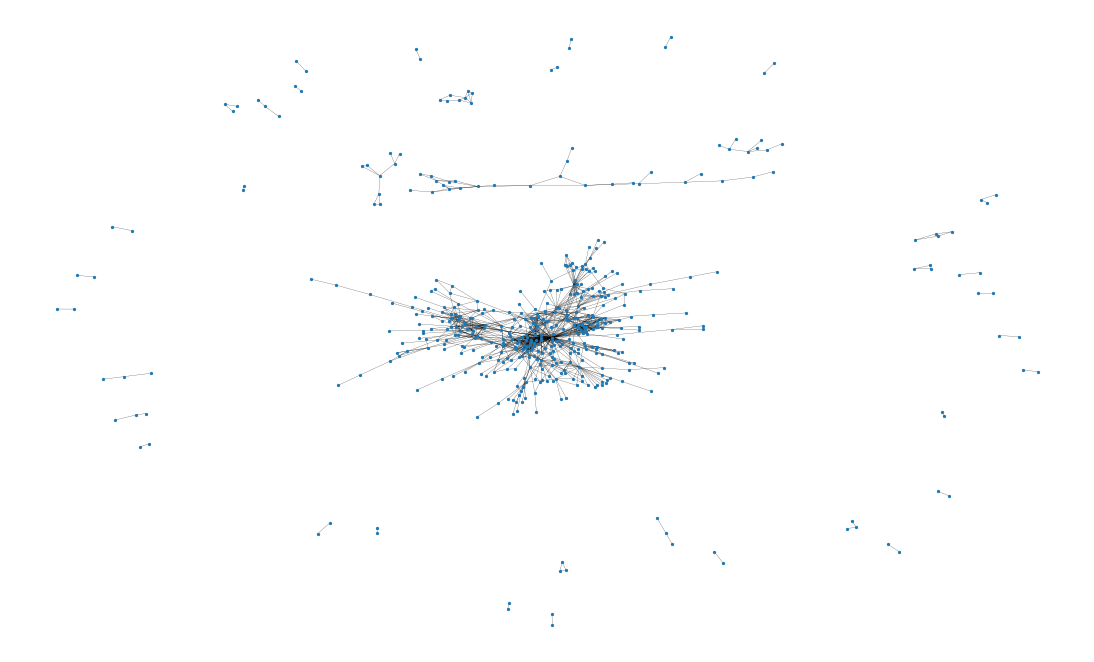

In [23]:
plt.figure(figsize=(15,9))
nx.draw(co_aps, **kwargs)

Un **componente conectado** es un grafo en el que cualquier nodo es accesible desde cualquier otro nodo. En el grafo de arriba, podemos ver que tenemos *muchos componentes conectados*, es decir, hay muchos sub grafos cuyos nodos son accesibles desde cualquier nodo, pero que están separados del resto. 

Lo que me gustaría ver es cómo va a evolucionar la cantidad de aristas, nodos y componentes a medida que crezca el umbral de facturas de co-aparición. El objetivo ideal sería tener un grafo grande (muchas aristas) pero que tenga pocos componentes conectados, o sea que no haya pequeños grupos de productos que se separen del resto, sino que todos los productos estén conectados entre sí.

Para observar esto, genero el gráfico a continuación

In [24]:
# Preparando los datps
# primero, armo todos los grafos que tengo almacenados en el txt.

nodos = []
aristas = []
componentes = []

for punto in puntos: # itero sobre todas las listas (grafos) en el txt
    grafo = nx.Graph() # genero un grafo
    grafo.add_edges_from(punto) # extraigo las aristas de ese grafo de la lista sobre la que está la iteración
    # aclaración: cuando paso una arista entre dos nodos, esos dos nodos se generan automáticamente.
    
    nodos.append(len(grafo.nodes)) # extraigo cantidad de nodos para el grafo
    aristas.append(len(grafo.edges)) # extraigo aristas para el grafo
    componentes.append(len(list(nx.connected_component_subgraphs(grafo)))) # extraigo componentes conectados

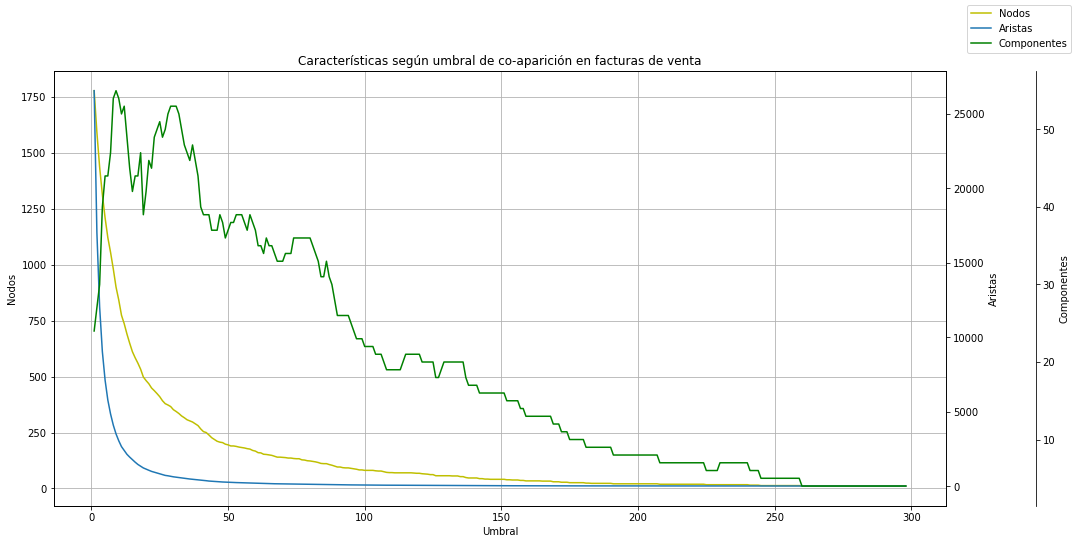

In [25]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title('Características según umbral de co-aparición en facturas de venta')
plt.xlabel('Umbral')
plt.grid(True)

ax1.set_ylabel('Nodos')
ax1.plot(range(1, len(nodos)), nodos[1:], 'y', label='Nodos')
# ax1.plot(range(len(nodos)), nodos, 'ro', markersize=2)

ax2 = ax1.twinx()
ax2.set_ylabel('Aristas')
ax2.plot(range(1, len(aristas)), aristas[1:], label='Aristas')
# ax2.plot(range(len(aristas)), aristas, 'ro', markersize=2)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.set_ylabel('Componentes')
ax3.plot(range(1, len(componentes)), componentes[1:], 'g', label='Componentes')
# ax3.plot(range(len(componentes)), componentes, 'ro', markersize=2)

fig.legend()